Loaded rows: 3150


[nltk_data] Downloading package vader_lexicon to C:\Users\HP
[nltk_data]     World\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


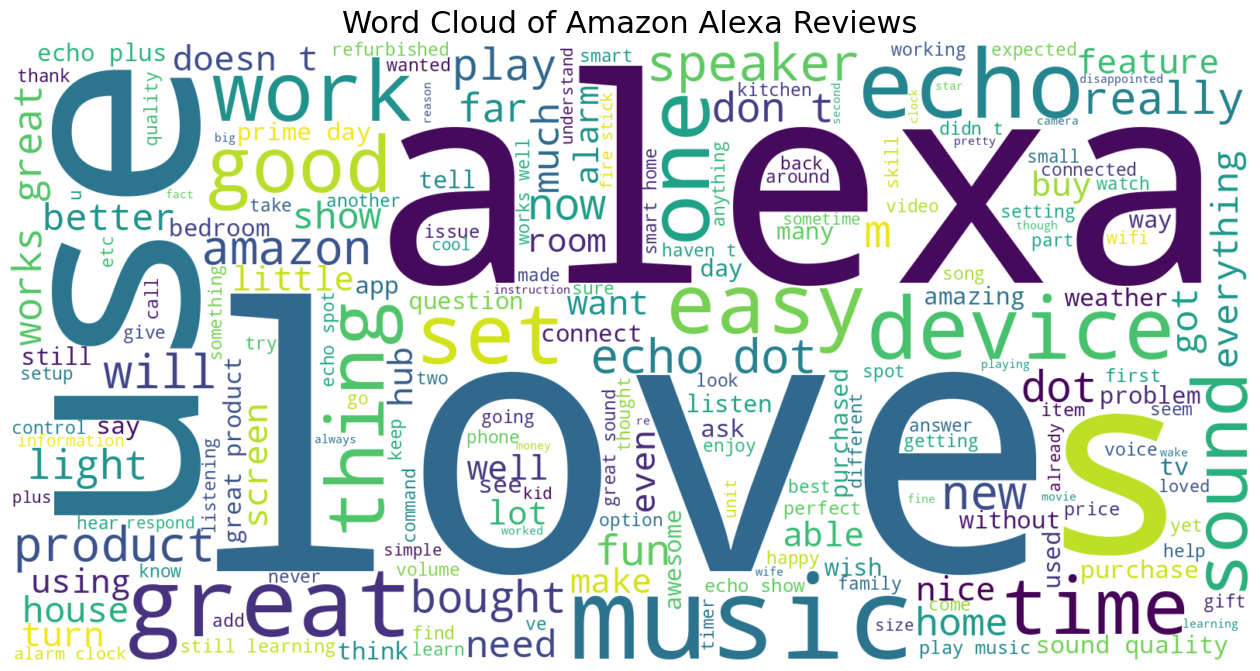


Top 12 Words per Topic:

Topic 1:
['does', 'home', 'don', 'screen', 'amazon', 'just', 'work', 'like', 'echo', '34', 'alexa', 'device']

Topic 2:
['set', 'new', 'music', 'easy', 'good', 'sound', 'dot', 'like', 'works', 'great', 'echo', 'love']

Topic 3:
['amazon', 'like', 'fun', 'play', 'product', 'easy', 'echo', 'love', 'great', 'alexa', 'music', 'use']



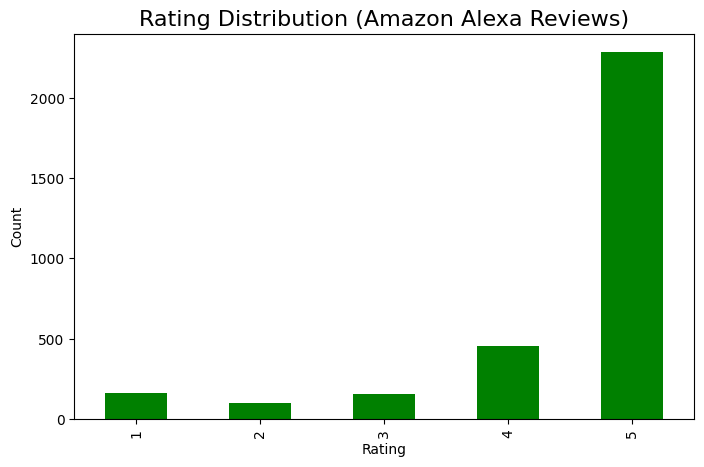

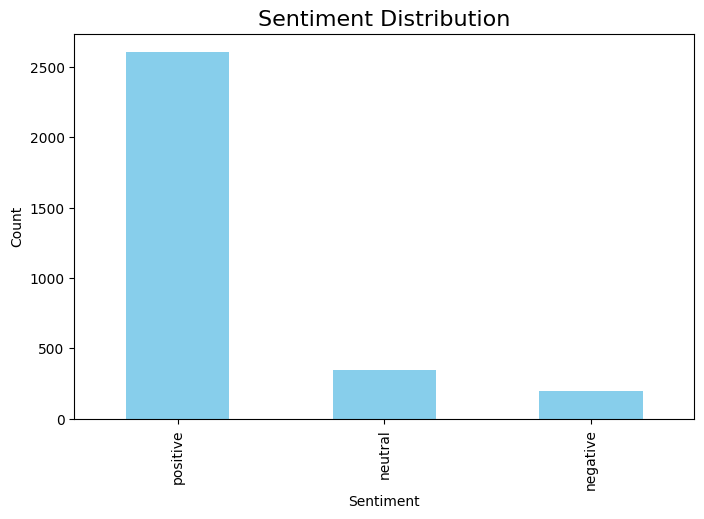

Saved: amazon_alexa_final_results.csv

Analysis Completed Successfully.


In [2]:
#      AMAZON ALEXA REVIEWS — TEXT MINING & SENTIMENT ANALYSIS


# 1. Import Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# 2. Load Dataset
df = pd.read_csv(r"C:\Users\HP World\OneDrive\Documents\Social Media Analystics Project\SocialMediaAnalyticsProject\Dataset\amazon_alexa.tsv", 
                 sep="\t", low_memory=False)
print("Loaded rows:", len(df))


# 3. Clean Text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)                # remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)        # remove punctuation
    text = re.sub(r"\s+", " ", text)                   # remove extra spaces
    return text.strip()

df["clean_text"] = df["verified_reviews"].apply(clean_text)


# 4. Sentiment Analysis
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

df["sentiment_score"] = df["clean_text"].apply(
    lambda x: sia.polarity_scores(x)["compound"]
)

def label_sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    return "neutral"

df["sentiment"] = df["sentiment_score"].apply(label_sentiment)


# 5. Word Cloud Visualization
text = " ".join(df["clean_text"])
wc = WordCloud(width=1600, height=800, background_color="white").generate(text)

plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Amazon Alexa Reviews", fontsize=22)
plt.show()


# 6. Topic Modeling (LDA)
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["clean_text"])

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

words = vectorizer.get_feature_names_out()
print("\nTop 12 Words per Topic:\n")
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}:")
    print([words[j] for j in topic.argsort()[-12:]])
    print()


# 7. Rating Distribution Plot
plt.figure(figsize=(8, 5))
df["rating"].value_counts().sort_index().plot(kind="bar", color="green")
plt.title("Rating Distribution (Amazon Alexa Reviews)", fontsize=16)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


# 8. Sentiment Distribution Plot
plt.figure(figsize=(8, 5))
df["sentiment"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


# 9. Save Final Processed Dataset
df.to_csv("amazon_alexa_final_results.csv", index=False)
print("Saved: amazon_alexa_final_results.csv")

print("\nAnalysis Completed Successfully.")
